In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
PATH1 = '/content/drive/My Drive/Dataset/'

## Dataset Overview

In [4]:
df = pd.read_csv(PATH1+'fer2013.csv')

In [5]:
#check usage values
#80% training, 10% validation and 10% test
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [6]:
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [7]:
#check target labels
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


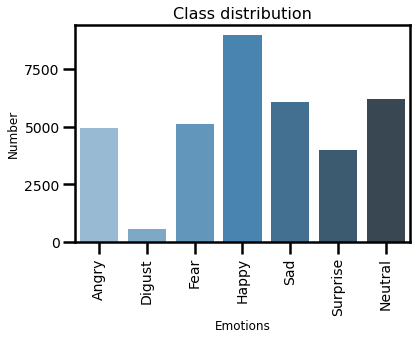

In [12]:
# Plotting a bar graph of the class distributions
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number, palette=("Blues_d"))
sns.set_context("poster")
plt.title('Class distribution', fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

## Pre processing

In [9]:
train_samples = df[df['Usage']=="Training"]
validation_samples = df[df["Usage"]=="PublicTest"]
test_samples = df[df["Usage"]=="PrivateTest"]

Train - Val - Test split

In [10]:
y_train = train_samples.emotion.astype(np.int32).values
y_valid = validation_samples.emotion.astype(np.int32).values
y_test = test_samples.emotion.astype(np.int32).values
  
X_train =np.array([ np.fromstring(image, np.uint8, sep=" ").reshape((48,48)) for image in train_samples.pixels])
X_valid =np.array([ np.fromstring(image, np.uint8, sep=" ").reshape((48,48)) for image in validation_samples.pixels])
X_test =np.array([ np.fromstring(image, np.uint8, sep=" ").reshape((48,48)) for image in test_samples.pixels])

Normalisation

In [11]:
X_train_std = X_train/255.
X_valid_std = X_valid/255.
X_test_std = X_test/255.